In [13]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

In [14]:
X, labels_true = make_circles(n_samples=1000, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

In [15]:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [16]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 2')

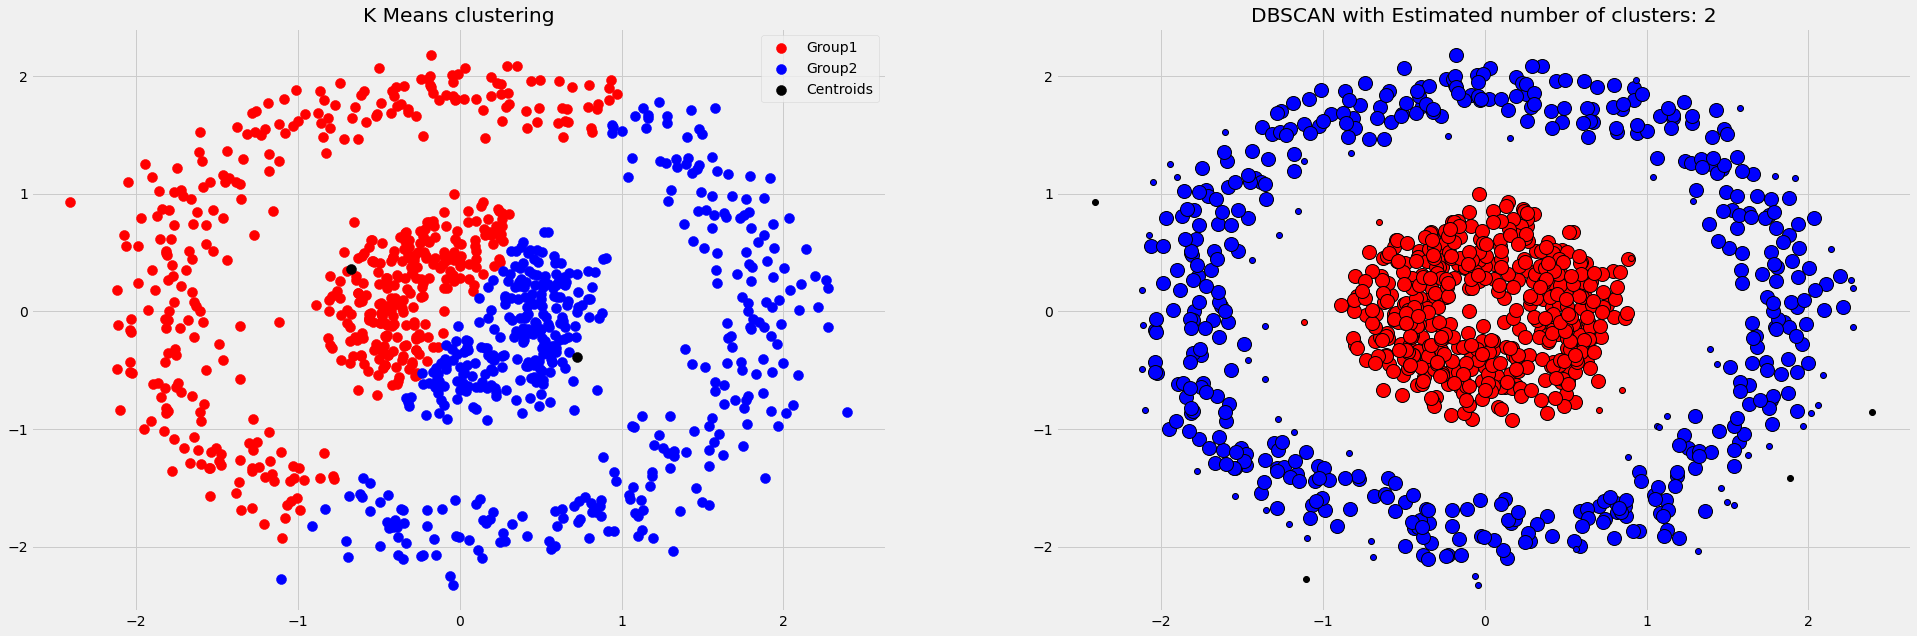

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols =2)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)


### For different Dataset

In [18]:
X, labels_true = make_moons(n_samples=1000, noise=0.1)
X = StandardScaler().fit_transform(X)

In [19]:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [20]:
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 2')

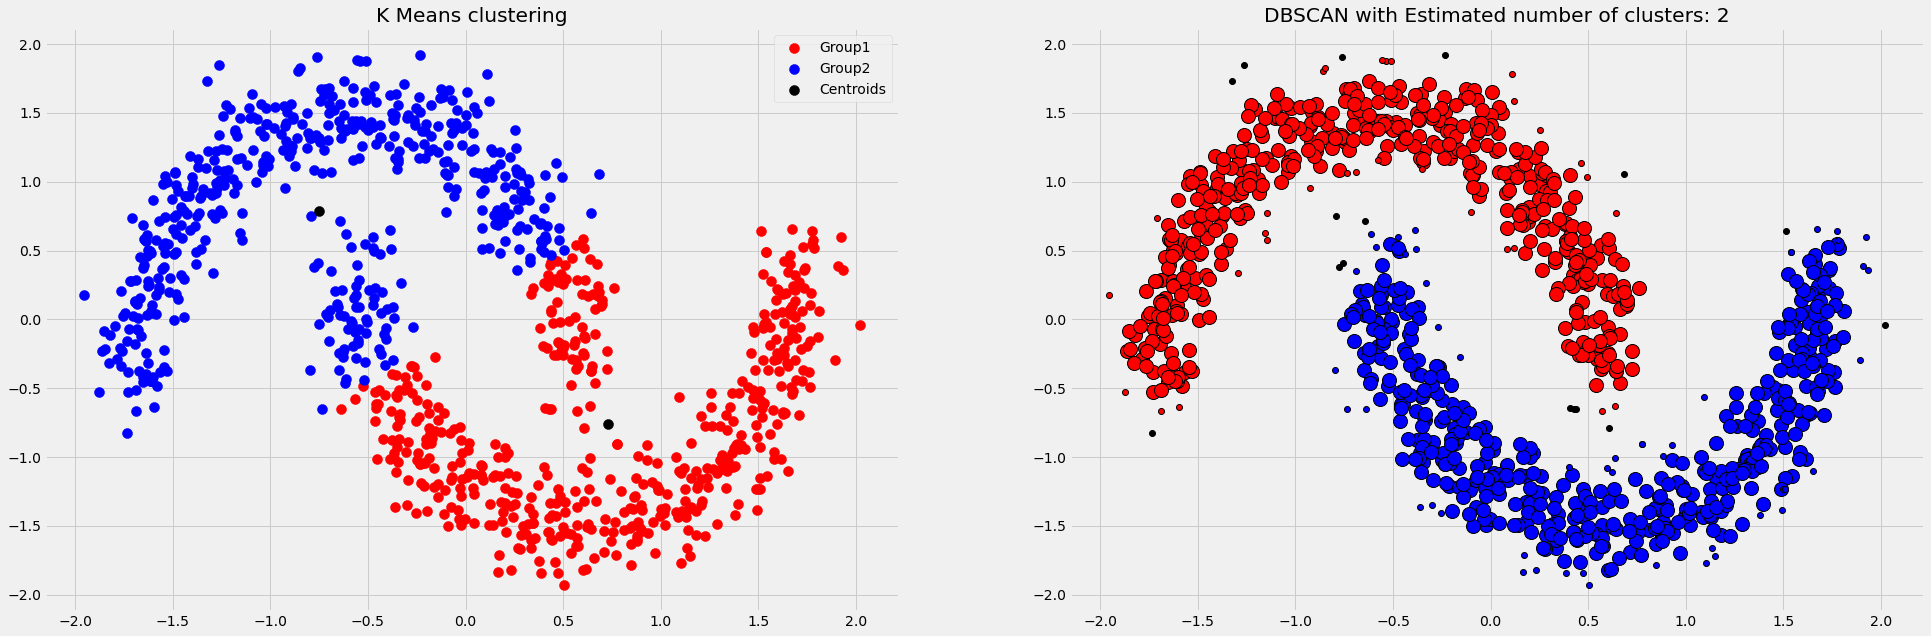

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols =2)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)
